# Trends in Florida Course Enrollment
- ## District-level
    - Bio-Chem-Physics barplot for current term for each district
    - Bio-Chem-Physics 4-year lineplot for each district
    - Course enrollment barh for each district
- ## School-level
    - Bio-Chem-Physics 4-year lineplot for each school in a district

In [1]:
# grabs enrolment data and combines into data_all dataframe
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rcParams['font.sans-serif'] = "AppleGothic"
pd.set_option('display.max_rows', 80)

In [2]:
# grab enrollment data
df1 = pd.read_csv('../data/1516s3-enrollment.csv').fillna(1)
df1['district_name'] = df1['district_name'].replace("DADE", "MIAMI-DADE")
df2 = pd.read_csv('../data/1617s3-enrollment.csv').fillna(1)
df2['district_name'] = df2['district_name'].replace("DADE", "MIAMI-DADE")
df3 = pd.read_csv('../data/1718s3-enrollment.csv').fillna(1)
df4 = pd.read_csv('../data/1819s2-enrollment.csv').fillna(1)

data_all = pd.DataFrame()
data_all = df1.merge(df2, on=['district_number', 'district_name', 'school_number', 'school_name', 'course_number', 'course_name'], how="outer")
data_all = data_all.merge(df3, on=['district_number', 'district_name', 'school_number', 'school_name', 'course_number', 'course_name'], how="outer")
data_all = data_all.merge(df4, on=['district_number', 'district_name', 'school_number', 'school_name', 'course_number', 'course_name'], how="outer")

data_all = data_all.fillna(0)
data_all = data_all.astype({"enrollment1516": np.int64, "enrollment1617": np.int64,  "enrollment1718": np.int64, "enrollment1819s2": np.int64})

# Physics 1, Physics 1 Honors, AP Physics 1, pre-AICE Physics 1, and pre-IB Physics 1
physics_1styear = ["2003380","2003390","2003421","2003432","2003836"]
physics_all = ["2003380","2003385","2003390","2003410","2003421","2003422","2003425","2003430","2003431","2003432","2003433","2003836","2003840","2003845","2003850"]
# Chemistry 1, Chemistry 1 Honors, pre-AICE Chemistry 1, and pre-IB Chemistry 1
chem_1styear = ["2003340","2003350","2003372","2003800"]
chem_all = ["2003340","2003345","2003350","2003360","2003370","2003371","2003372","2003373","2003800","2003805","2003810","2003820"]
# Physical Science, Physical Science Honors, pre-AICE Physical Science
physci = ["2003310","2003320","2003335"]
# Earth/space Science, Earth/Space Science Honors
earthspace = ["2001310","2001320"]
# Biology, Biology Honors, pre-AICE Biology 1, pre-AP Biology, AP Bio
bio_1styear = ["2000310","2000320","2000322","2000335","2000340"]
bio_all = ["2000310","2000315","2000320","2000321","2000322","2000323","2000330","2000335","2000340","2000800","2000805","2000810","2000820"]

first_year = physics_1styear + chem_1styear + bio_1styear + earthspace

bio_color = '#55AD89'
chem_color = '#6388B4'
phy_color = '#FFAE34'
es_color = '#8C564B'
colors_area = {"First-year Biology": '#55AD89', "First-year Chemistry": '#6388B4', "es": '#8C564B', "First-year Physics": '#FFAE34'}
colors_bio = {2000310: '#55AD89', 2000315: '#55AD89', 2000320: '#55AD89', 2000321: '#55AD89', 2000322: '#55AD89', 2000323: '#55AD89', 2000330: '#55AD89', 2000335: '#55AD89', 2000340: '#55AD89', 2000800: '#55AD89', 2000805: '#55AD89', 2000810: '#55AD89', 2000820: '#55AD89'}
colors_chem = {2003340: '#6388B4', 2003345: '#6388B4', 2003350: '#6388B4', 2003360: '#6388B4', 2003370: '#6388B4', 2003371: '#6388B4', 2003372: '#6388B4', 2003373: '#6388B4', 2003800: '#6388B4', 2003805: '#6388B4', 2003810: '#6388B4', 2003820: '#6388B4'}
colors_es = {2001310: '#8C564B', 2001320: '#8C564B', 2003431: '#FFAE34'}
colors_phy = {2003380: '#FFAE34', 2003385: '#FFAE34', 2003390: '#FFAE34', 2003410: '#FFAE34', 2003421: '#FFAE34', 2003422: '#FFAE34', 2003425: '#FFAE34', 2003430: '#FFAE34', 2003431: '#FFAE34', 2003432: '#FFAE34', 2003433: '#FFAE34', 2003836: '#FFAE34', 2003840: '#FFAE34', 2003845: '#FFAE34', 2003850: '#FFAE34'}
colors_ps = {2003310: '#64c1ef', 2003320: '#64c1ef', 2003335: '#64c1ef'}
colors = {**colors_bio,**colors_chem,**colors_es,**colors_phy,**colors_ps}

data_all['content_area'] = 0
data_all.loc[(data_all['course_number'].str.startswith('20')) \
         & (data_all['course_number'].str.len() == 7), "content_area"] = "science"
data_all['subcontent_area'] = 0
data_all.loc[(data_all['course_number'].isin(physics_1styear)), 'subcontent_area'] = "First-year Physics"
data_all.loc[(data_all['course_number'].isin(chem_1styear)), 'subcontent_area'] = "First-year Chemistry"
data_all.loc[(data_all['course_number'].isin(physci)), 'subcontent_area'] = "ps"
data_all.loc[(data_all['course_number'].isin(earthspace)), 'subcontent_area'] = "es"
data_all.loc[(data_all['course_number'].isin(bio_1styear)), 'subcontent_area'] = "First-year Biology"
data_all['middle'] = "no"
data_all.loc[(data_all['course_name'].str.startswith('M/J')), "middle"] = "yes"
data_all.loc[(data_all['course_name'].str.contains('MYP')), "middle"] = "yes"
data_all['charter'] = "no"
data_all.loc[(data_all['school_name'].str.contains('CHARTER')), "charter"] = "yes"

terms_list = ["enrollment1516","enrollment1617","enrollment1718","enrollment1819s2"]

# create dict {course_name: course_number}
df_temp = data_all.query('content_area == "science"').loc[:,['course_name','course_number']].drop_duplicates()
course_dict = dict(zip(df_temp.iloc[:,0], df_temp.iloc[:,1]))
#data_all.to_csv('enrollment-1519.csv')
data_all.head(2)

,district_number,district_name,school_number,school_name,course_number,course_name,enrollment1516,enrollment1617,enrollment1718,enrollment1819s2,content_area,subcontent_area,middle,charter
0,1,ALACHUA,22,EARLY LEARNING ACADEMY AT DUVAL,5001010,ART - GRADE K,152,142,140,117,0,0,no,no
1,1,ALACHUA,22,EARLY LEARNING ACADEMY AT DUVAL,5010041,LANG ARTS GRADE K,152,142,140,121,0,0,no,no


In [3]:
# filter out M/J and IB MYP courses (middle == "no")
data = data_all.query('middle == "no"').copy()

# identify current term
current_term = "enrollment1819s2"

# District Plots

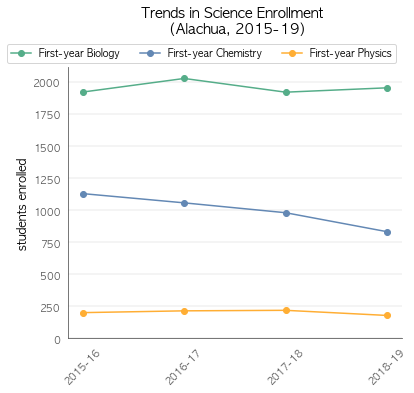

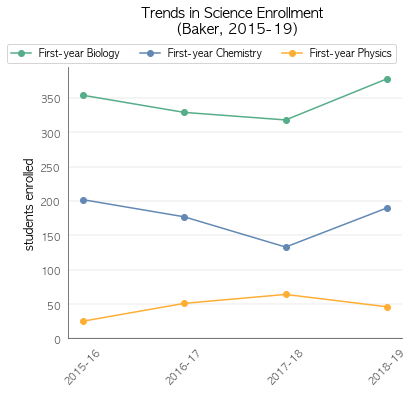

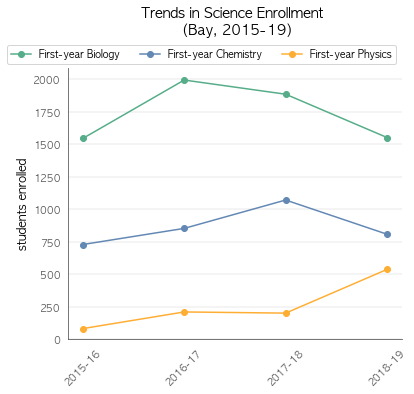

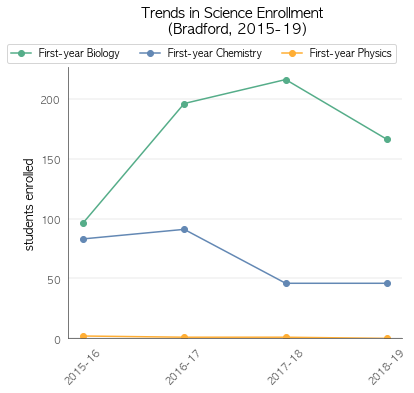

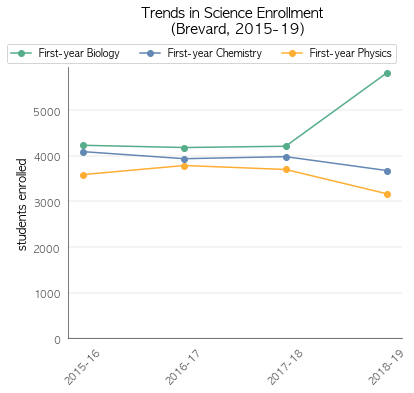

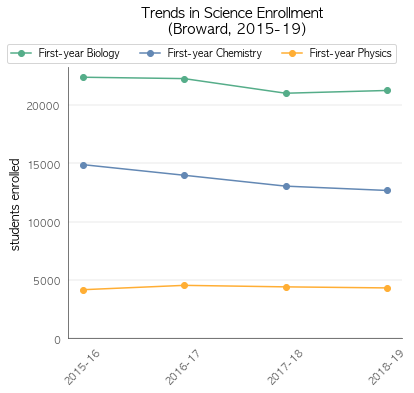

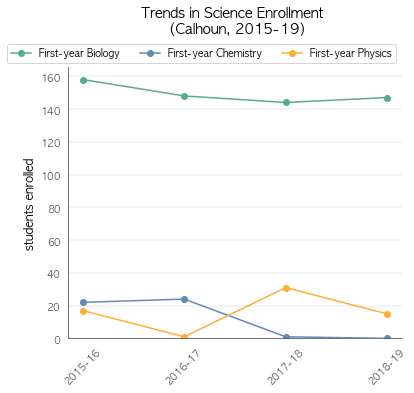

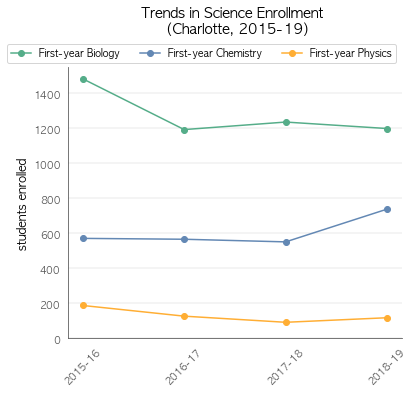

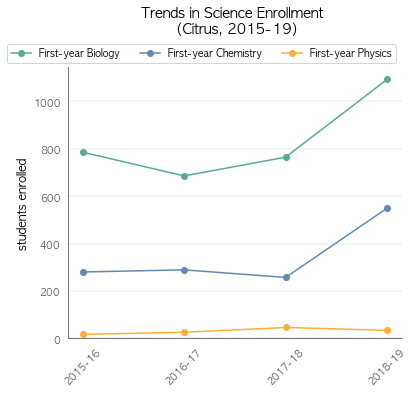

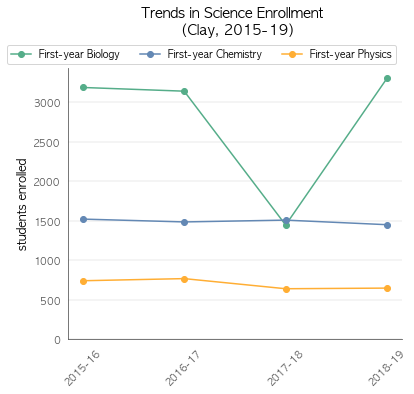

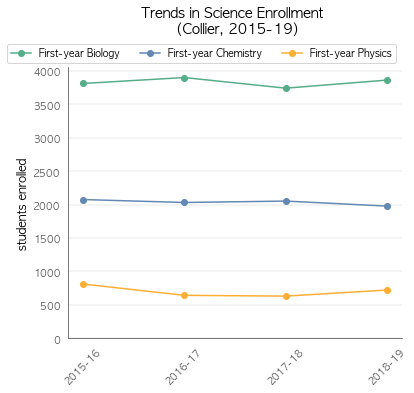

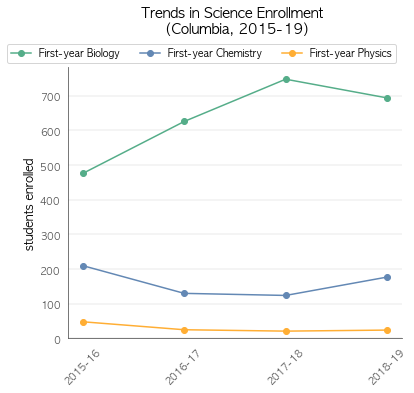

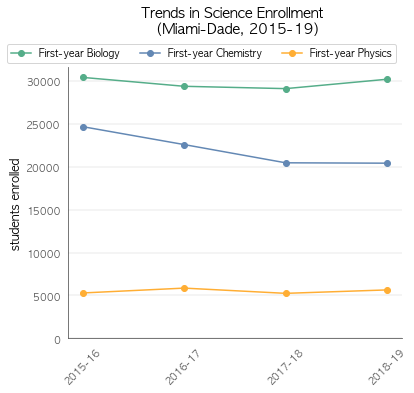

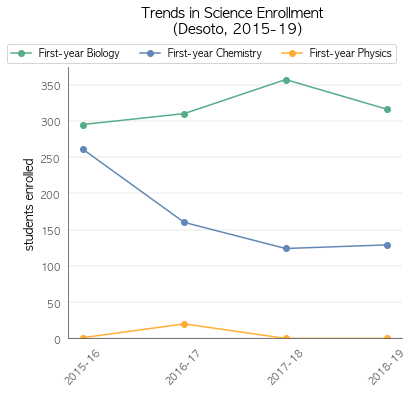

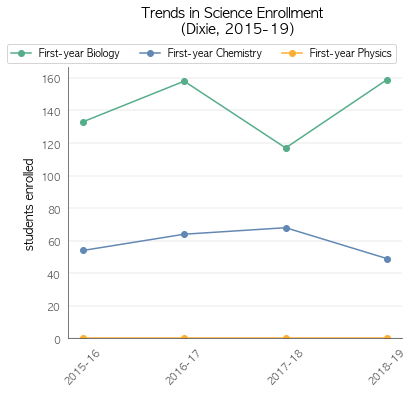

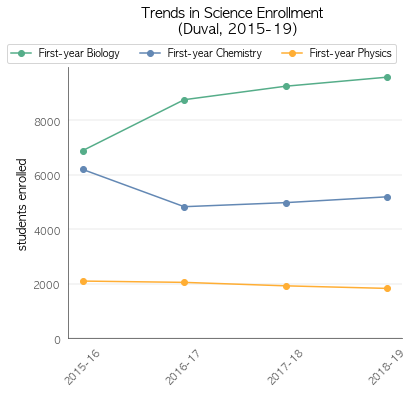

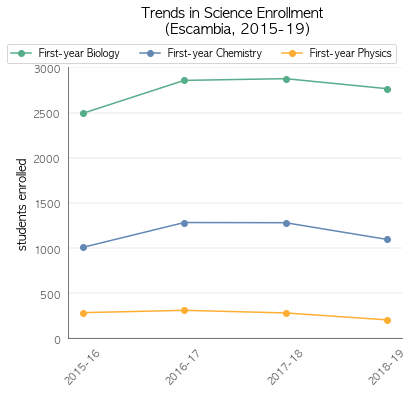

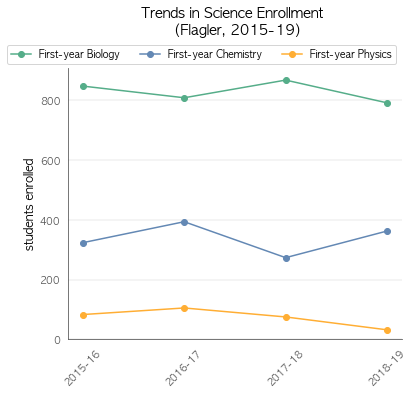

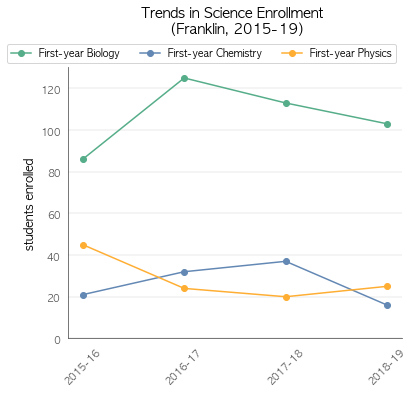

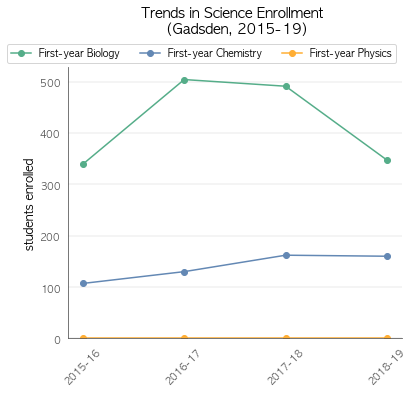

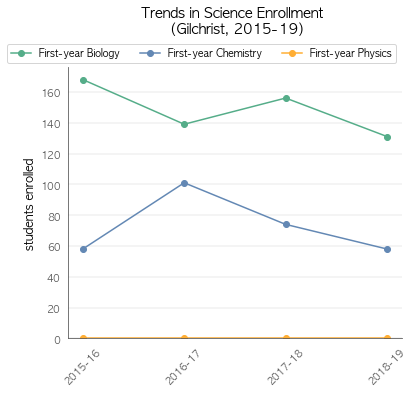

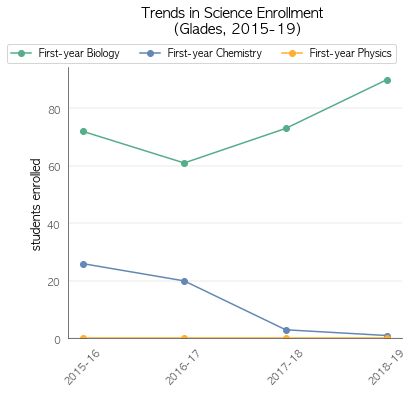

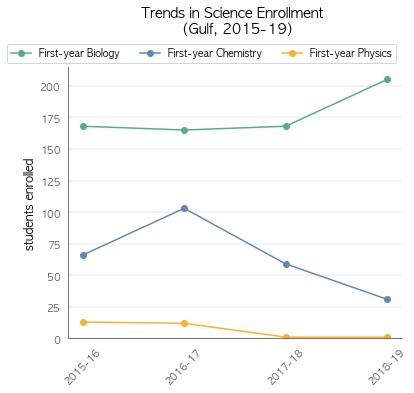

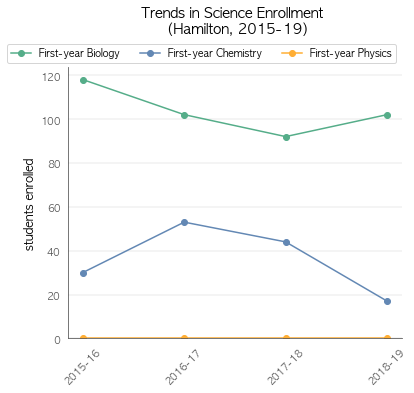

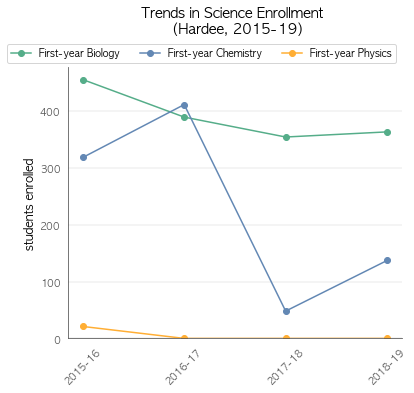

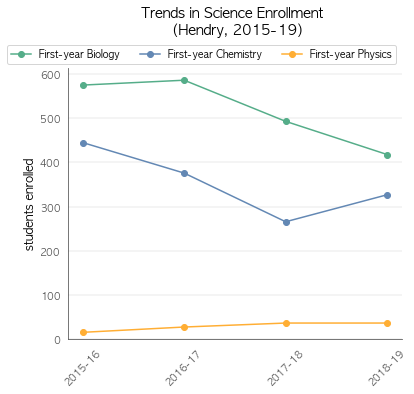

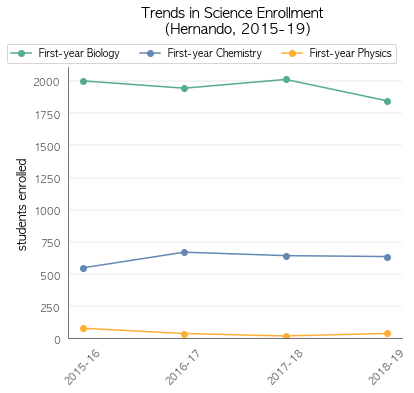

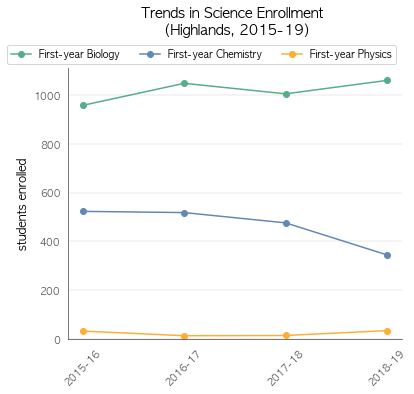

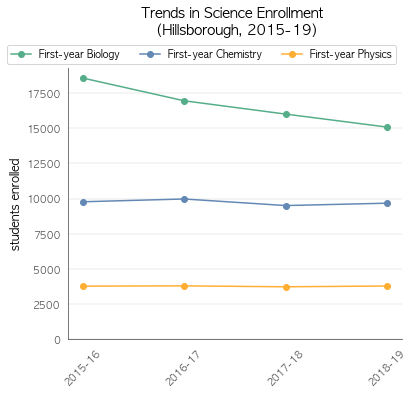

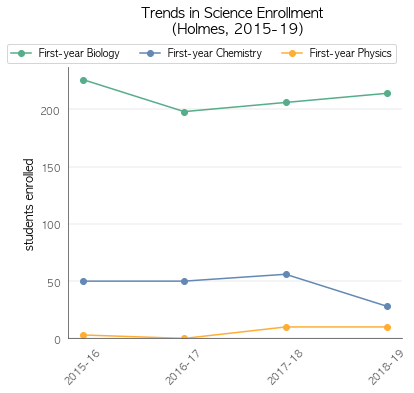

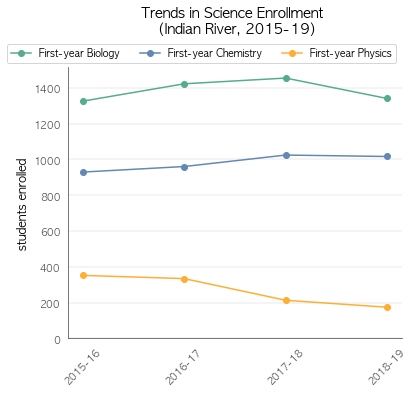

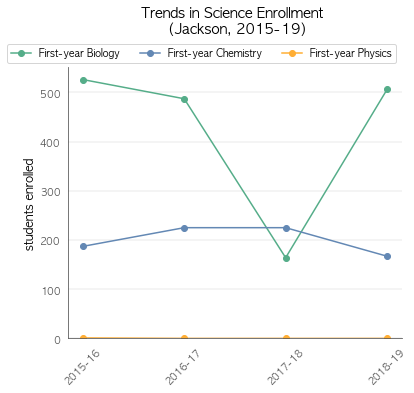

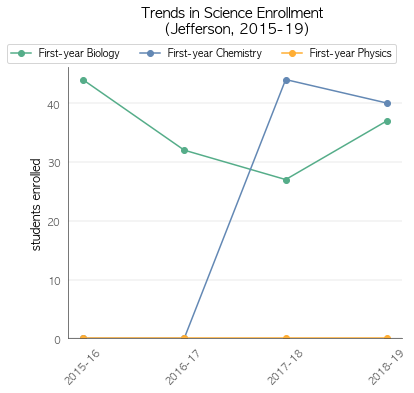

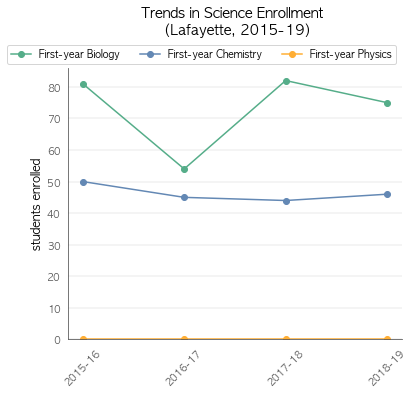

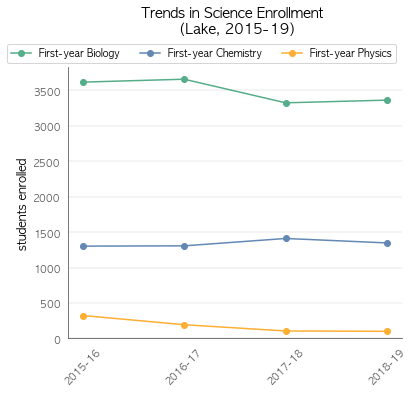

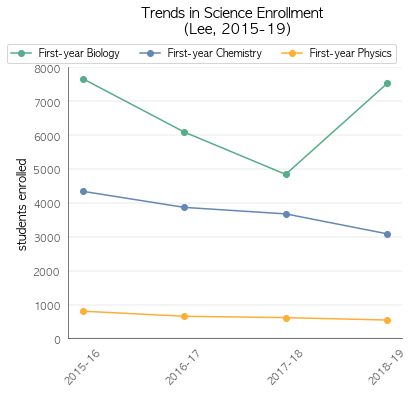

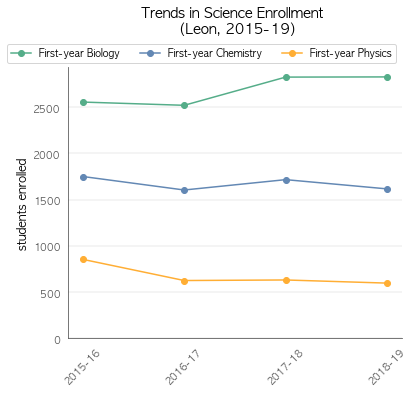

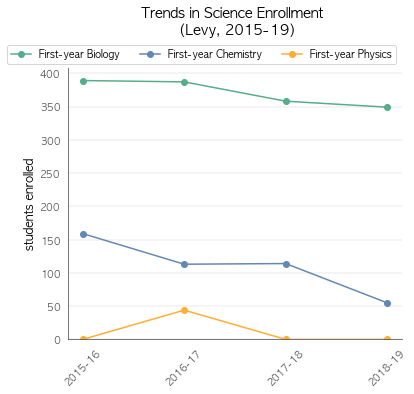

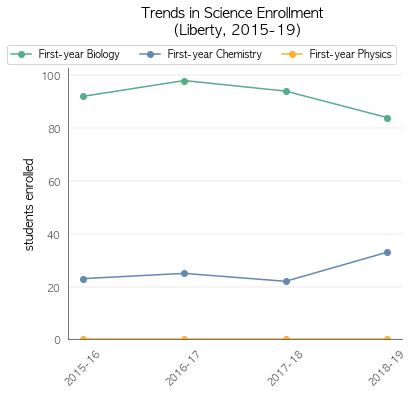

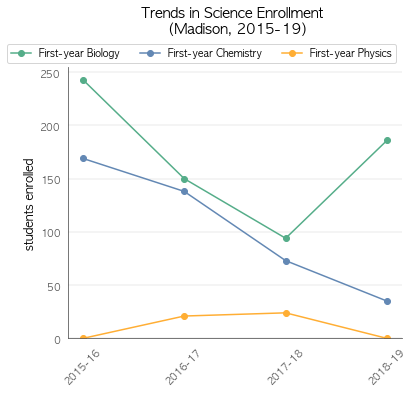

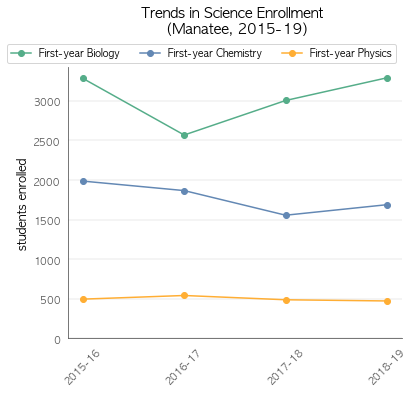

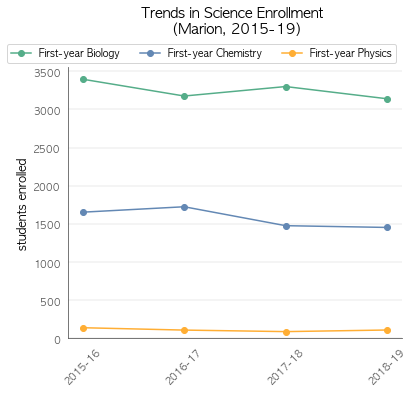

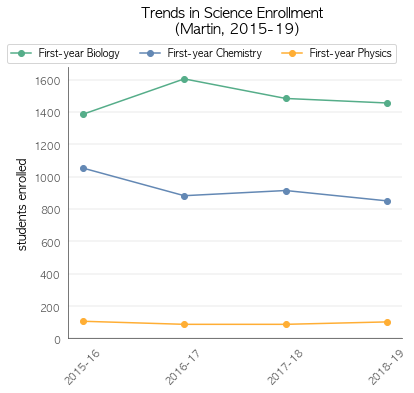

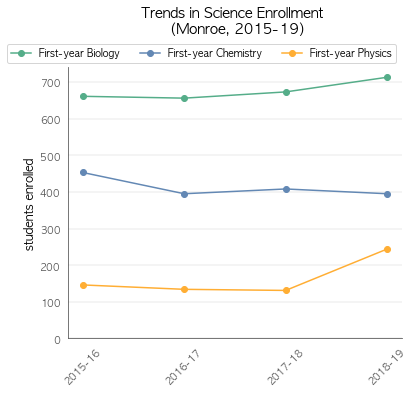

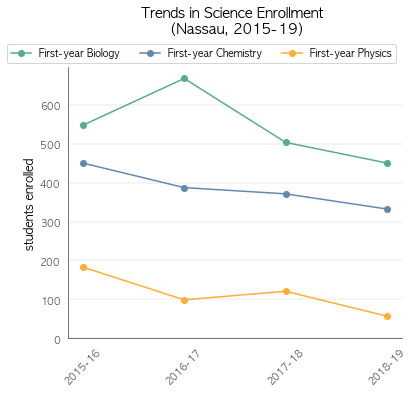

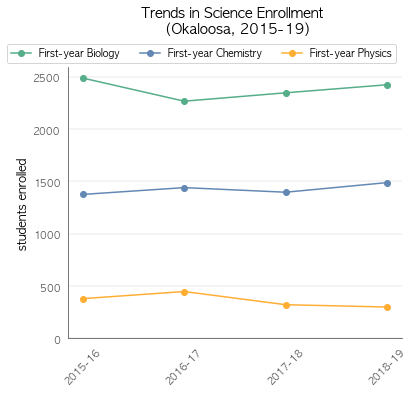

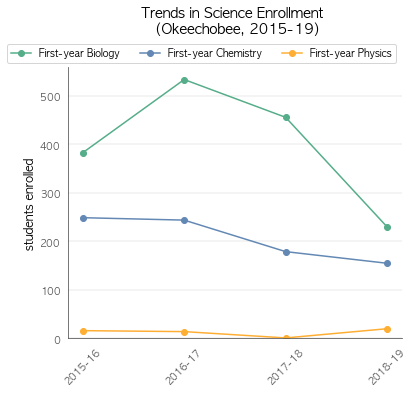

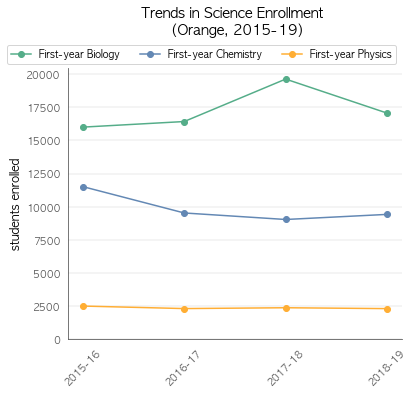

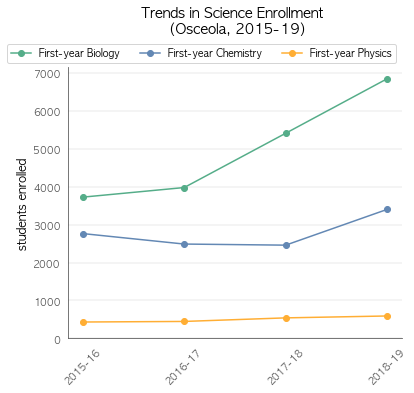

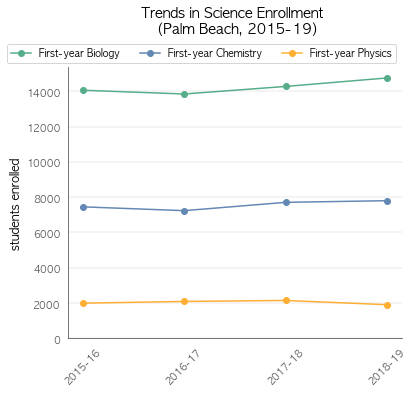

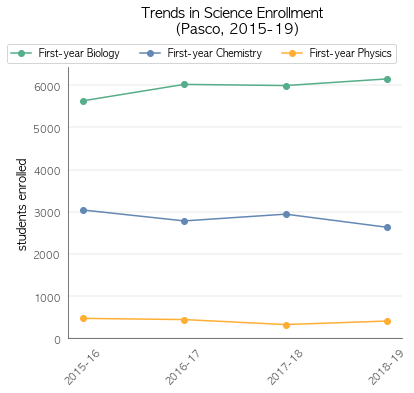

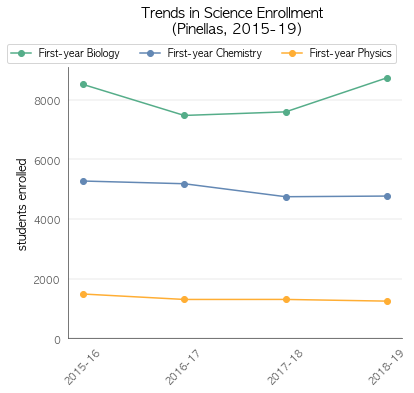

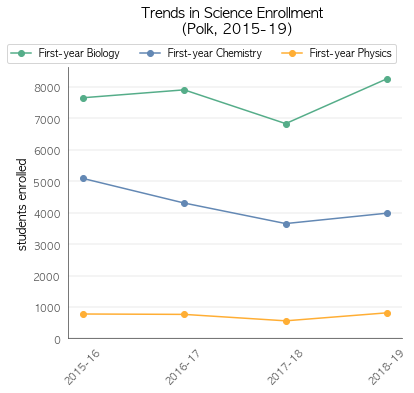

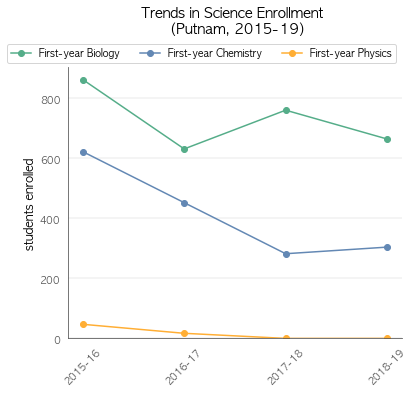

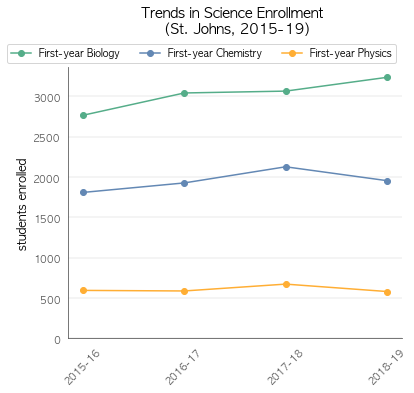

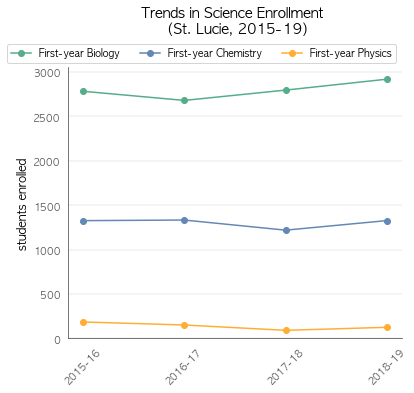

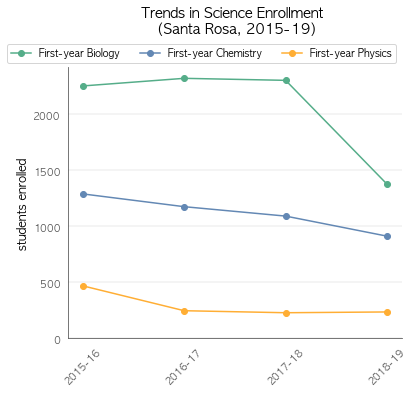

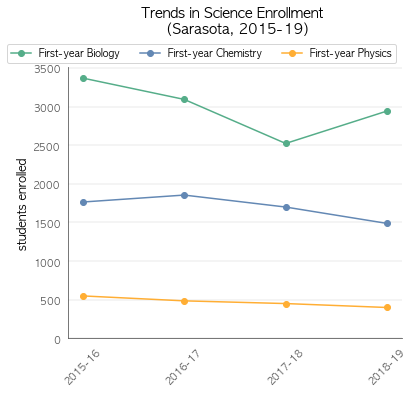

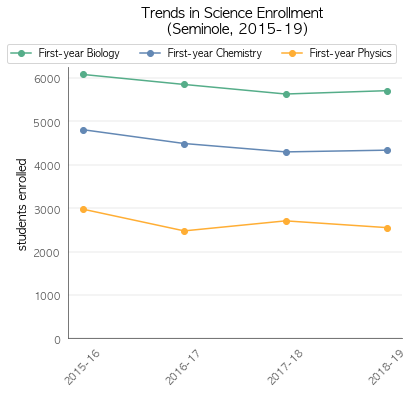

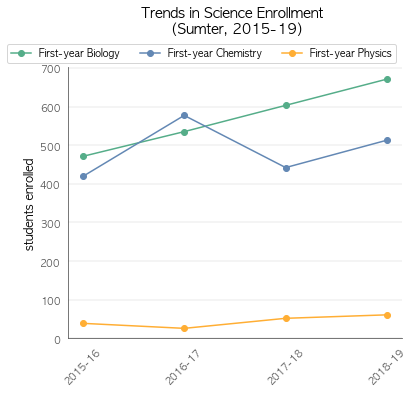

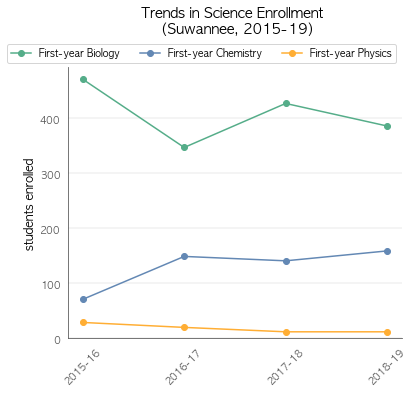

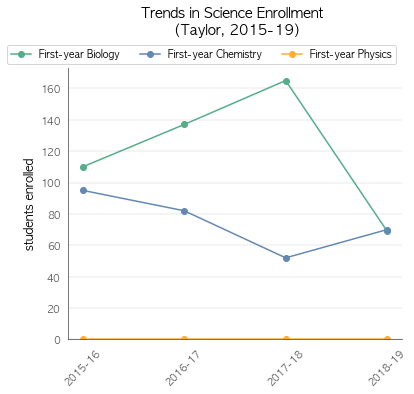

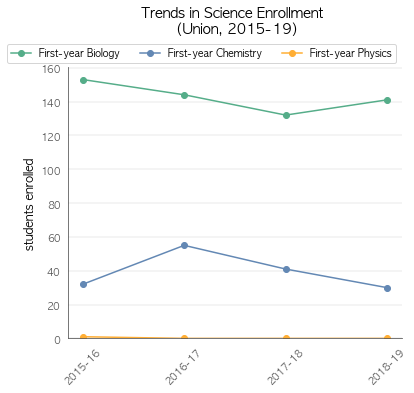

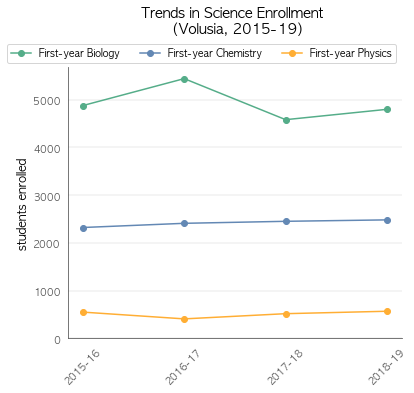

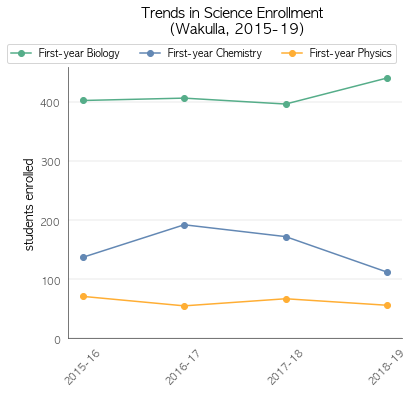

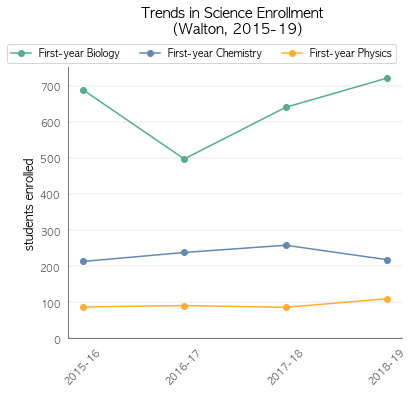

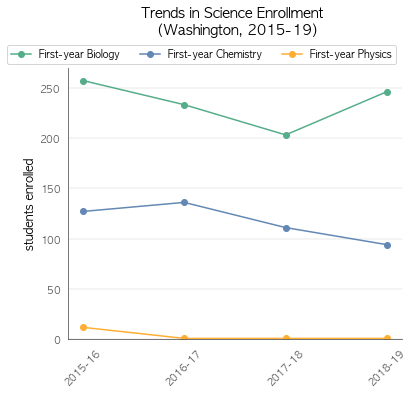

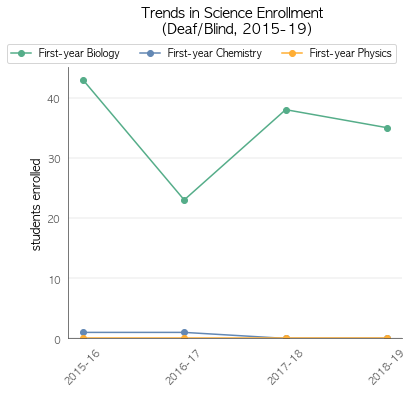

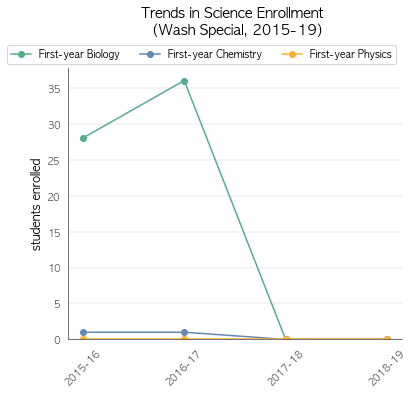

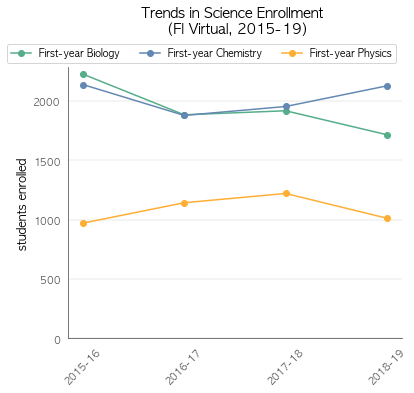

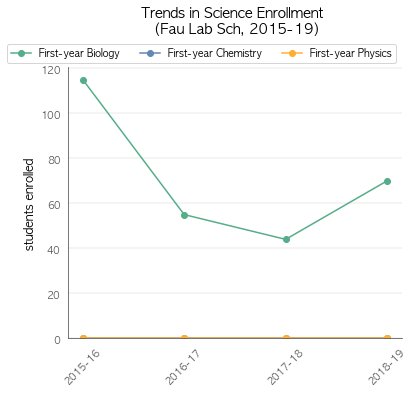

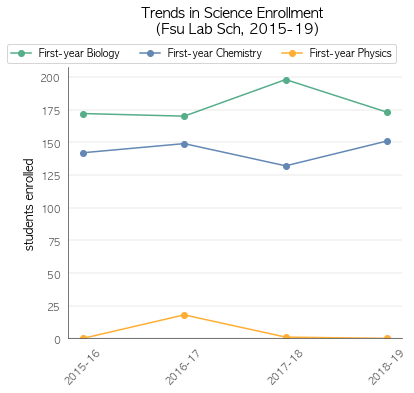

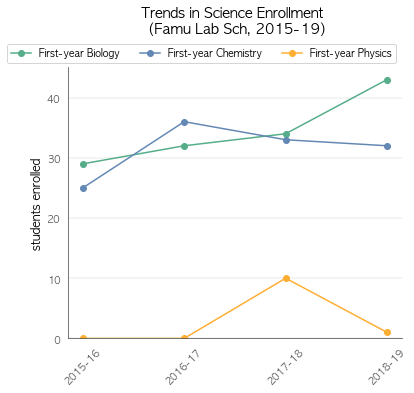

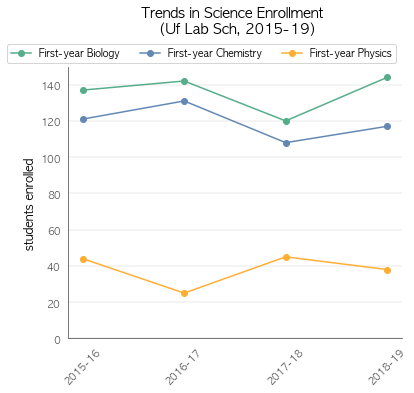

In [4]:
## BCP trend plot for each district ##

data_high = data_all.query('middle == "no"')

for i in data.district_name.unique():
    dist = i
    
    ###############
    ## BCP trend ##
    test = pd.DataFrame()
    plotdata = pd.DataFrame()
    test = data.loc[(data['content_area'] == "science") & (data['district_name'] == dist)]
    plotdata = pd.DataFrame({'subcontent_area': ['First-year Biology', 'First-year Chemistry', 'First-year Physics']})
    terms = terms_list

    for x in terms:
        term = x
        test2 = pd.DataFrame()
        test2 = test.groupby("subcontent_area", as_index=False)[[term]].sum()
        test2 = test2.loc[test2['subcontent_area']\
                          .isin(["First-year Biology","First-year Chemistry","First-year Physics"])]
        plotdata = plotdata.merge(test2,on='subcontent_area',how='left')
        plotdata = plotdata.fillna(0)

    plotty = plotdata.T.iloc[1:,:]
    plotty.columns = ['First-year Biology', 'First-year Chemistry', 'First-year Physics']
    
    fig, ax1 = plt.subplots(1,1,figsize=(6,5))
    xticks = ['2015-16','2016-17','2017-18','2018-19']
    title= "Trends in Science Enrollment \n (" + dist.title() + ", 2015-19)"

    ax1.plot(xticks, plotty.iloc[:,0], marker='o', color=bio_color)
    ax1.plot(xticks, plotty.iloc[:,1], marker='o', color=chem_color)
    ax1.plot(xticks, plotty.iloc[:,2], marker='o', color=phy_color)
    ax1.legend(plotty.columns, loc='center', bbox_to_anchor=(.4, 1.05), ncol=3, fancybox=True)
    ax1.set_title(title, fontsize=14, y=1.1)
    ax1.tick_params(axis='x',labelrotation=45)
    ax1.tick_params(labelcolor='#565656')
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('students enrolled', fontsize=12)
    ax1.spines['bottom'].set_color('#565656')
    ax1.spines['left'].set_color('#565656')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

    dist = dist.replace("/","").replace(" ","_").replace(".","")
    fig.savefig("../plots/District_plots/" + dist + "_11BCPtrend" + ".png", bbox_inches="tight", dpi = 300)
    plt.show()
    plt.close(fig)

In [ ]:
## course barh for each district ##

data_high = data_all.query('middle == "no"')

for i in data.district_name.unique():
    dist = i
    
    fig, ax2 = plt.subplots(1,1, figsize=(6,5))
    
    #################
    ## Course barh ##
    term1 = current_term
    testy = pd.DataFrame()
    testy = data_high.loc[(data['content_area'] == "science") & (data_high['district_name'] == dist)]
    testy.insert(2, 'enrollment', testy[term1])
    #group and sum
    testy2 = pd.DataFrame()
    testy2 = testy.groupby("course_number").enrollment.sum().reset_index()
    #unique courses
    testy3 = pd.DataFrame()
    testy3 = testy[['course_number','course_name']].drop_duplicates()
    #add total enrollment for each unique course
    plotdata2 = pd.DataFrame()
    plotdata2 = testy3.merge(testy2, on='course_number').sort_values(by='enrollment', ascending=True).iloc[-15:,:]
    plotdata2 = plotdata2.astype({"course_number": np.int64})
    count = plotdata2['course_number'].count()
    title2 = "Science Courses, by Enrollment \n (" + dist.title() + ", 20" + term1[10:12] + "-" + term1[12:] + ")"

    ax2 = plotdata2.plot.barh(x='course_name', y='enrollment', ax=ax2, \
                            color= [colors.get(i, '#D3D3D3') for i in plotdata2['course_number']], \
                            grid=False, legend=False, edgecolor = "none", width=.85)

    hues = ["#55AD89", "#6388B4", "#FFAE34", "#8C564B", "#64c1ef"]
    texts = ["Biology", "Chemistry", "Physics", "Earth/Space", "Physical"]
    patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                         label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
    ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
              loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)
    
    ax2.tick_params(labelcolor='#565656')
    ax2.set_xlabel('students enrolled', fontsize=12)
    ax2.xaxis.set_ticks_position('none')
    ax2.yaxis.set_ticks_position('none')
    ax2.yaxis.label.set_visible(False)
    ax2.set_title(title2, fontsize=14, y=1.1)
    ax2.spines['bottom'].set_color('#565656')
    ax2.spines['left'].set_color('#565656')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    dist = dist.replace("/","").replace(" ","_").replace(".","")
    fig.savefig("../plots/District_plots/" + dist + "_12courses" + ".png", bbox_inches="tight", dpi = 300)
    plt.show()
    plt.close(fig)

In [ ]:
#############################
## both plots in one image ##

data_high = data_all.query('middle == "no"')

for i in data.district_name.unique():
    dist = i
    
    ###############
    ## BCP trend ##
    test = pd.DataFrame()
    plotdata = pd.DataFrame()
    test = data.loc[(data['content_area'] == "science") & (data['district_name'] == dist)]
    plotdata = pd.DataFrame({'subcontent_area': ['First-year Biology', 'First-year Chemistry', 'First-year Physics']})
    terms = terms_list

    for x in terms:
        term = x
        test2 = pd.DataFrame()
        test2 = test.groupby("subcontent_area", as_index=False)[[term]].sum()
        test2 = test2.loc[test2['subcontent_area']\
                          .isin(["First-year Biology","First-year Chemistry","First-year Physics"])]
        plotdata = plotdata.merge(test2,on='subcontent_area',how='left')
        plotdata = plotdata.fillna(0)

    plotty = plotdata.T.iloc[1:,:]
    plotty.columns = ['First-year Biology', 'First-year Chemistry', 'First-year Physics']
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
    xticks = ['2015-16','2016-17','2017-18','2018-19']
    title= "Trends in Science Enrollment \n (" + dist.title() + ", 2015-19)"

    ax1.plot(xticks, plotty.iloc[:,0], marker='o', color=bio_color)
    ax1.plot(xticks, plotty.iloc[:,1], marker='o', color=chem_color)
    ax1.plot(xticks, plotty.iloc[:,2], marker='o', color=phy_color)
    ax1.legend(plotty.columns, loc='center', bbox_to_anchor=(.4, 1.05), ncol=3, fancybox=True)
    ax1.set_title(title, fontsize=14, y=1.1)
    ax1.tick_params(axis='x',labelrotation=45)
    ax1.tick_params(labelcolor='#565656')
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('students enrolled', fontsize=12)
    ax1.spines['bottom'].set_color('#565656')
    ax1.spines['left'].set_color('#565656')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    
    #################
    ## Course barh ##
    term1 = current_term
    testy = pd.DataFrame()
    testy = data_high.loc[(data['content_area'] == "science") & (data_high['district_name'] == dist)]
    testy.insert(2, 'enrollment', testy[term1])
    #group and sum
    testy2 = pd.DataFrame()
    testy2 = testy.groupby("course_number").enrollment.sum().reset_index()
    #unique courses
    testy3 = pd.DataFrame()
    testy3 = testy[['course_number','course_name']].drop_duplicates()
    #add total enrollment for each unique course
    plotdata2 = pd.DataFrame()
    plotdata2 = testy3.merge(testy2, on='course_number').sort_values(by='enrollment', ascending=True).iloc[-15:,:]
    plotdata2 = plotdata2.astype({"course_number": np.int64})
    count = plotdata2['course_number'].count()
    title2 = "Science Courses, by Enrollment \n (" + dist.title() + ", 20" + term1[10:12] + "-" + term1[12:] + ")"

    ax2 = plotdata2.plot.barh(x='course_name', y='enrollment', ax=ax2, \
                            color= [colors.get(i, '#D3D3D3') for i in plotdata2['course_number']], \
                            grid=False, legend=False, edgecolor = "none", width=.85)

    hues = ["#55AD89", "#6388B4", "#FFAE34", "#8C564B"]
    texts = ["Biology", "Chemistry/Physical", "Physics", "Earth/Space"]
    patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                         label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
    ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
              loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)
    
    ax2.tick_params(labelcolor='#565656')
    ax2.set_xlabel('students enrolled', fontsize=12)
    ax2.xaxis.set_ticks_position('none')
    ax2.yaxis.set_ticks_position('none')
    ax2.yaxis.label.set_visible(False)
    ax2.set_title(title2, fontsize=14, y=1.1)
    ax2.spines['bottom'].set_color('#565656')
    ax2.spines['left'].set_color('#565656')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    dist = dist.replace("/","").replace(" ","_").replace(".","")
    #fig.savefig("../plots/District_plots/" + dist + "_1courses" + ".png", bbox_inches="tight", dpi = 300)
    plt.show()
    plt.close(fig)

# School-level

In [ ]:
#############################
## both plots in one image ##

data_HS = data.query('subcontent_area == "First-year Biology" & enrollment1819s2 > 50')
data_high = data_all.query('middle == "no"')

for i in data_HS.sort_values(by="district_name").district_name.unique():
    dist = i
        
    for j in data_HS.loc[data_HS['district_name'] == dist].sort_values(by='school_name').school_name.unique():
        sch = j

        ###############
        ## BCP trend ##
        test1 = pd.DataFrame()
        plotdata1 = pd.DataFrame()
        test1 = data_high.loc[(data_high['content_area'] == "science") & (data_high['school_name'] == sch)]
        plotdata1 = pd.DataFrame({'subcontent_area': ['First-year Biology', 'First-year Chemistry', 'First-year Physics']})
        terms = terms_list

        for x in terms:
            term = x
            test2 = pd.DataFrame()
            test2 = test1.groupby("subcontent_area", as_index=False)[[term]].sum()
            test2 = test2.loc[test2['subcontent_area']\
                              .isin(["First-year Biology","First-year Chemistry","First-year Physics"])]
            plotdata1 = plotdata1.merge(test2,on='subcontent_area',how='left')
            plotdata1 = plotdata1.fillna(0)

        plotty = plotdata1.T.iloc[1:,:]
        plotty.columns = ['First-year Biology', 'First-year Chemistry', 'First-year Physics']

        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
        xticks = ['2015-16','2016-17','2017-18','2018-19']
        ax1.plot(xticks, plotty.iloc[:,0], marker='o', color=bio_color)
        ax1.plot(xticks, plotty.iloc[:,1], marker='o', color=chem_color)
        ax1.plot(xticks, plotty.iloc[:,2], marker='o', color=phy_color)
        ax1.legend(plotty.columns, loc='center', bbox_to_anchor=(.4, 1.05), ncol=3, fancybox=True)
        title= "Trends in Science Enrollment \n (" + sch.title() + ", 2015-19)"
        ax1.set_title(title, fontsize=14, y=1.1)
        ax1.tick_params(axis='x',labelrotation=45)
        ax1.tick_params(labelcolor='#565656')
        ax1.xaxis.set_ticks_position('none')
        ax1.yaxis.set_ticks_position('none')
        ax1.set_ylim(bottom=0)
        ax1.set_ylabel('students enrolled', fontsize=12)
        ax1.spines['bottom'].set_color('#565656')
        ax1.spines['left'].set_color('#565656')
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

        #################
        ## Course barh ##
        termy = current_term
        testy = pd.DataFrame()
        testy = data_high.loc[(data_high['content_area'] == "science") & (data_high['school_name'] == sch)]
        testy.insert(2, 'enrollment', testy[termy])

        #group and sum
        testy2 = pd.DataFrame()
        testy2 = testy.groupby("course_number").enrollment.sum().reset_index()

        #unique courses
        testy3 = pd.DataFrame()
        testy3 = testy[['course_number','course_name']].drop_duplicates()

        #add total enrollment for each unique course
        plotdata2 = pd.DataFrame()
        plotdata2 = testy3.merge(testy2, on='course_number').sort_values(by='enrollment', ascending=True).iloc[-15:,:]
        plotdata2 = plotdata2.astype({"course_number": np.int64})
        count = plotdata2['course_number'].count()
        title2 = "Science Courses, by Enrollment \n (" + sch.title() + ", 20" + termy[10:12] + "-" + termy[12:] + ")"

        ax2 = plotdata2.plot.barh(x='course_name', y='enrollment', ax=ax2, \
                                color= [colors.get(i, '#D3D3D3') for i in plotdata2['course_number']], \
                                grid=False, legend=False, edgecolor = "none", width=.85)

        hues = ["#55AD89", "#6388B4", "#FFAE34", "#8C564B", "#64c1ef"]
        texts = ["Biology", "Chemistry", "Physics", "Earth/Space", "Physical"]
        patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
                  loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)

        ax2.tick_params(labelcolor='#565656')
        ax2.set_xlabel('students enrolled', fontsize=12)
        ax2.xaxis.set_ticks_position('none')
        ax2.yaxis.set_ticks_position('none')
        ax2.yaxis.label.set_visible(False)
        ax2.set_title(title2, fontsize=14, y=1.1)
        ax2.spines['bottom'].set_color('#565656')
        ax2.spines['left'].set_color('#565656')
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)

        plt.tight_layout()
        dist = dist.replace("/","").replace(" ","_").replace(".","")
        sch = sch.replace("SCHOOL","").replace("MIDDLE","").replace("HIGH","")\
            .replace("-","").replace("/","").replace("  ","").replace(" ","_").replace("__","_").replace(".","")
        #fig.savefig("../plots/School_plots/" + dist + "/" + sch[:10] + ".png", bbox_inches="tight", dpi = 300)
        plt.show()
        plt.close(fig)

In [ ]:
## linetrend for all courses at a school over all terms
sch = "WINDERMERE HIGH SCHOOL"

temp = pd.DataFrame()
temp = data.query('school_name == @sch & content_area == "science"').iloc[:,4:]
new = temp.sort_values(by='course_number', ascending=True).set_index('course_name').iloc[:,1:-2]


newish = temp.sort_values(by='enrollment1819s2', ascending=False).set_index('course_name').T.iloc[1:-2,:]
ax = newish.iloc[:-2,:].plot.line(figsize=(6,6), marker= 'o', \
                               color= [colors.get(int(course_dict.get(i, "0")), '#D3D3D3') for i in newish.columns])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

new